Consider the function
$$f(x)=\frac{\sin(x)}{x^3}$$
Consider the first-order forward difference, second-order central difference and fourthorder
central-difference approximations to the first derivative. Plot the absolute value of
the difference between computed and exact derivative (i.e. the truncation error) at x=4.0
for different grid sizes (x) and show that the error changes with grid size as expected
(order of accuracy). Employ at least five different grid sizes.

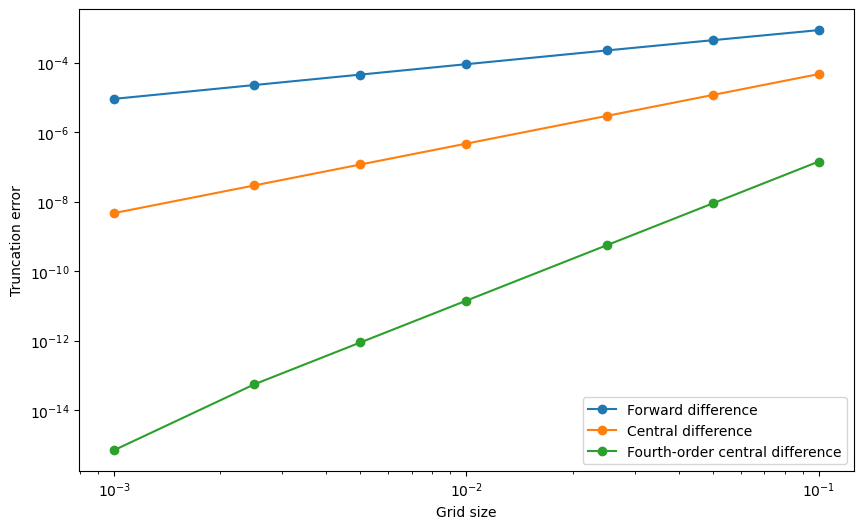

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# define the original function and its derivative
def f(x):
    return np.sin(x) / x**3

def f_prime(x):
    return -3*np.sin(x)/x**4 + np.cos(x)/x**3

# define the forward difference, central difference, and fourth-order central difference
def forward_diff(f, x, h):
    return (f(x+h) - f(x)) / h

def central_diff(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

def fourth_order_central_diff(f, x, h):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h)

# compute the truncation errors for different grid sizes at x = 4.0
x_val = 4.0
grid_sizes = np.array([0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001])
errors_forward = np.abs(f_prime(x_val) - forward_diff(f, x_val, grid_sizes))
errors_central = np.abs(f_prime(x_val) - central_diff(f, x_val, grid_sizes))
errors_fourth_order = np.abs(f_prime(x_val) - fourth_order_central_diff(f, x_val, grid_sizes))

# plot the truncation errors
plt.figure(figsize=(10, 6))
plt.loglog(grid_sizes, errors_forward, 'o-', label='Forward difference')
plt.loglog(grid_sizes, errors_central, 'o-', label='Central difference')
plt.loglog(grid_sizes, errors_fourth_order, 'o-', label='Fourth-order central difference')
plt.xlabel('Grid size')
plt.ylabel('Truncation error')
plt.legend()
plt.show()

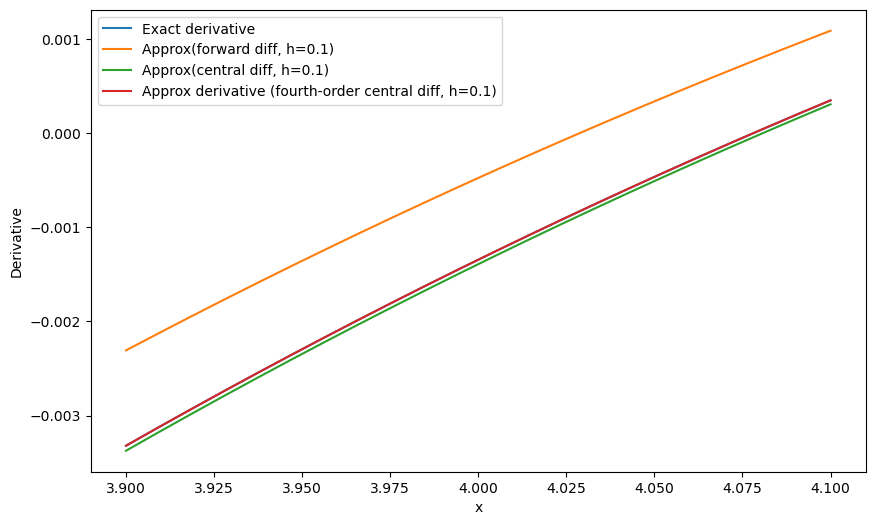

In [2]:
# define the range of x values
x_vals = np.linspace(3.9, 4.1, 1000)
grid_sizes = np.array([0.1])

plt.figure(figsize=(10, 6))
for h in grid_sizes:
    accurate_derivative = f_prime(x_vals)
    approx_derivative_forward = np.array([forward_diff(f, x, h) for x in x_vals])
    approx_derivative_central = np.array([central_diff(f, x, h) for x in x_vals])
    approx_derivative_fourth_order = np.array([fourth_order_central_diff(f, x, h) for x in x_vals])

    plt.plot(x_vals, accurate_derivative, label='Exact derivative')
    plt.plot(x_vals, approx_derivative_forward, label=f'Approx(forward diff, h={h})')
    plt.plot(x_vals, approx_derivative_central, label=f'Approx(central diff, h={h})')
    plt.plot(x_vals, approx_derivative_fourth_order, label=f'Approx derivative (fourth-order central diff, h={h})')

plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend()
plt.show()